Patrick Cummins

Professor Yan

STAT 3255

April 26th, 2023

# Exoplanet Hunting with Convolutional Neural Networks

In [300]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [346]:
data = pd.read_csv('exoTrain.csv')

In [347]:
data.loc[data['LABEL'] == 1, 'LABEL'] = 0
data.loc[data['LABEL'] == 2, 'LABEL'] = 1

## Background

Exoplanet Hunting is the idea of using light data from stars to find planets deep into outer space. This is possible by looking for 'transits', or the time in which a planet passes between a star and its observer. The light emitting from the star dims as the planet blocks its path, giving us data that would tell us if a planet is orbiting that star.

This data was collected through observations made by the NASA Kepler space telescope, specifically **Campaign 3** in 2014. These telescopes measure the light curve of stars deep into space. When these curves 'dip', we know that this is a ***transit***, and thus there is likely to be a planet orbiting this star.

We measure light intensity as 'flux'. For the purposes of this analysis, we can imagine that a flux is like a minute, or second, or hour: it is a point in time in which we are measuring light data. Our data is structured as such: a .csv file with 5087 rows, representing stars, and 3198 columns, representing the **flux values**. These are the 'points in time' mentioned above. Essentially, each column represents a new time in which light intensity was measured. Our data also comes prelabeled, telling us whether there is or is not a planet orbiting the star. This makes this a supervised learning problem, as our data is prelabeled.

In [303]:
data.head(100)

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,1,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,1,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,1,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,1,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,1,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,-286.04,-277.18,-329.63,-294.66,-234.19,-150.71,-158.08,-114.81,-122.00,...,10.50,46.57,69.72,58.66,82.86,53.06,-16.86,-45.82,-47.48,-38.17
96,0,4761.75,4503.50,4759.00,5007.75,5395.00,5350.75,5355.75,5329.00,5117.00,...,386.25,-109.25,-300.75,-436.50,-768.50,-1228.75,-796.50,-79.75,534.50,1280.50
97,0,-35.84,-32.77,-46.67,-23.55,-45.17,-61.51,-60.35,-62.24,-72.04,...,-127.63,-108.32,-104.61,-72.08,-80.99,-55.63,-138.11,-118.21,-106.13,-100.85
98,0,23.20,-3.18,22.33,10.06,8.24,18.04,9.84,-0.75,-5.02,...,21.34,8.35,4.09,-4.47,-16.85,3.29,-3.87,-23.13,-2.44,-10.43


## Goals

Within this project, I will be creating a **Convolutional Neural Network** in order to classify and predict whether a star has an orbiting exoplanet or not. This project presents some challenges I have yet to face in my data science career:
- working with 'time series' data
- working with Convolutional Neural Networks
- working with data that likely requires intense preprocessing
- working with highly imbalanced data
- working with such a high volume of data

### Convolutional Neural Networks

Convolutional neural networks (CNNs) are a type of neural network that are particularly well-suited for image and signal processing tasks. Unlike traditional neural networks, which are fully connected and treat input data as a flat vector, CNNs operate on multidimensional input data such as images or time-series data.

CNNs use a series of filters (also known as kernels) that slide over the input data, applying convolution operations to each patch of the input. These filters learn to recognize local patterns in the input data, such as edges, corners, and other features. The outputs of the filters are then pooled, which reduces the dimensionality of the output and helps to extract higher-level features from the input data.

## Understanding the Data

We can look at flux values over time for both stars with and without confirmed exoplanets. Here is the flux chart for a star with a confirmed exoplanet:

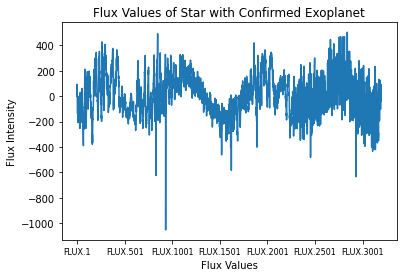

In [304]:
plt.title('Flux Values of Star with Confirmed Exoplanet')
plt.xlabel('Flux Values')
plt.ylabel('Flux Intensity')
plt.plot(data.iloc[0, ])
plt.xticks(np.arange(1, 3199, 500), fontsize = 8)
plt.show()


Here is the flux chart for a star with no confirmed exoplanet:

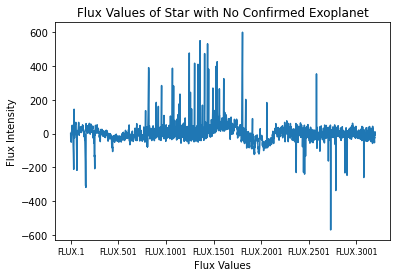

In [305]:
plt.title('Flux Values of Star with No Confirmed Exoplanet')
plt.xlabel('Flux Values')
plt.ylabel('Flux Intensity')
plt.plot(data.iloc[38, ])
plt.xticks(range(len(data.columns)), data.columns)
plt.xticks(np.arange(1, 3199, 500), fontsize = 8)
plt.show()

As you can see, the dip in the first graph represents the transit that can be seen and the point in time in which a planet passes between the star and the Kepler telescope.

To understand our data better, we look at multiple stars with confirmed exoplanets:

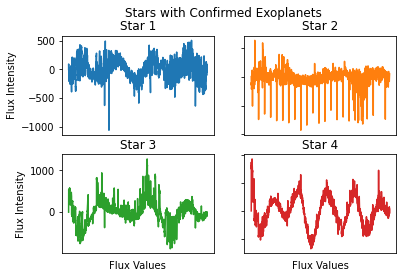

In [306]:
fig, axs = plt.subplots(2, 2)
fig.suptitle('Stars with Confirmed Exoplanets')
axs[0,0].plot(data.iloc[0, ])
axs[0,0].set_title('Star 1')
axs[0,0].set_xticks([])
axs[0,1].plot(data.iloc[1, ], 'tab:orange')
axs[0,1].set_title('Star 2')
axs[0,1].set_xticks([])
axs[1,0].plot(data.iloc[2, ], 'tab:green')
axs[1,0].set_title('Star 3')
axs[1,0].set_xticks([])
axs[1,1].plot(data.iloc[3, ], 'tab:red')
axs[1,1].set_title('Star 4')
axs[1,1].set_xticks([])
for ax in axs.flat:
    ax.set(xlabel='Flux Values', ylabel='Flux Intensity')
for ax in fig.get_axes():
    ax.label_outer()

## Preprocessing

### Normalization

When working with light data, we likely need to normalize and standardize our data. In the above graphic, it is seen that we have clean data, but it is not normalized. Checking the distribution of our data to see what kind of normalization to do:

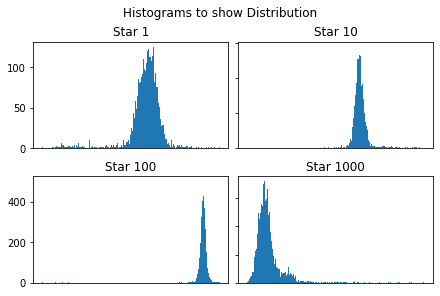

In [307]:
fig, axs = plt.subplots(2, 2, layout = 'constrained')
fig.suptitle('Histograms to show Distribution')
axs[0,0].hist(data.iloc[1, 1:], bins = 200)
axs[0,0].set_title('Star 1')
axs[0,0].set_xticks([])
axs[0,1].hist(data.iloc[10, 1:], bins = 200)
axs[0,1].set_title('Star 10')
axs[0,1].set_xticks([])
axs[1,0].hist(data.iloc[100, 1:], bins = 200)
axs[1,0].set_title('Star 100')
axs[1,0].set_xticks([])
axs[1,1].hist(data.iloc[1000, 1:], bins = 200)
axs[1,1].set_title('Star 1000')
axs[1,1].set_xticks([])

for ax in fig.get_axes():
    ax.label_outer()
plt.show()


The data follows a Gaussian distribution
- First, I normalized the data by scaling vectors to unit norm.
- Then, I applied a Gaussian filter to match the distributions seen in the histogram above.
- Lastly, I standardized the data by scaling to unit variance.

### Principal Component Analysis

Because there were so many features (3197 flux value columns), principal component analysis was chosen to reduce the dimensionality of our dataset. The number of principal compnents ranged between 5-40 depending on the model, which I will touch on later. For the fully pre-processed model, there were 8 principal components to explained 90% of the variance:

In [406]:
from scipy import ndimage
normalized_data = data.copy()
normalized_data = normalized_data.drop(columns=['LABEL'])
from sklearn import preprocessing
normalized_data_array = preprocessing.normalize(normalized_data, norm = 'l2')
normalized_data_array = ndimage.filters.gaussian_filter(normalized_data_array, sigma=10)
normalized_data_array = preprocessing.StandardScaler().fit_transform(normalized_data)
normalized_data = pd.DataFrame(normalized_data_array, columns=normalized_data.columns)


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_22936\4010632054.py:6: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  normalized_data_array = ndimage.filters.gaussian_filter(normalized_data_array, sigma=10)


In [407]:
from sklearn.decomposition import PCA
pca = PCA() 
pca.fit(normalized_data)
k=0
current_variance=0
total = sum(pca.explained_variance_)
while current_variance/total < 0.9:
    current_variance += pca.explained_variance_[k]
    k=k+1
k

8

Text(0, 0.5, 'Variance')

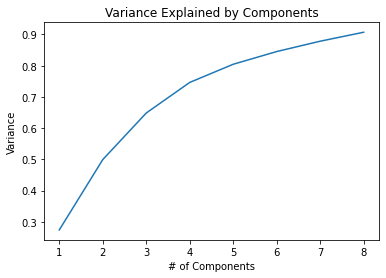

In [389]:
pca = PCA(n_components=8)
normalized_data_pca = pca.fit_transform(normalized_data)
plt.plot(range(1, k + 1), pca.explained_variance_ratio_.cumsum(), linestyle = '-')
plt.title('Variance Explained by Components')
plt.xlabel('# of Components')
plt.ylabel('Variance')

In [390]:
n_components = normalized_data_pca.shape[1]
column_names = [f"PC{i}" for i in range(1, n_components + 1)]
normalized_data_pca = pd.DataFrame(data=normalized_data_pca, columns=column_names)
normalized_data_pca['Label'] = data['LABEL']

The data was also highly imbalanced:

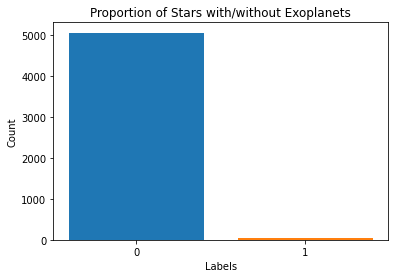

In [376]:
label_counts = normalized_data_pca['Label'].value_counts()
x = [0, 1]
labels = ['0', '1']
colors = ['tab:blue', 'tab:orange']
fig, ax = plt.subplots()
ax.bar(x, label_counts, color=colors)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_xlabel('Labels')
ax.set_ylabel('Count')
ax.set_title('Proportion of Stars with/without Exoplanets')
plt.show()

Using Synthetic Minority Over-sampling Technique (SMOTE), I was able to gain resampled and more balanced data:

In [408]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
X = normalized_data_pca.iloc[:, :-1]
y = normalized_data_pca.iloc[:, -1]
sm = SMOTE(sampling_strategy = 0.5, random_state = 10)
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.75)
x_train, y_train = sm.fit_resample(x_train, y_train)


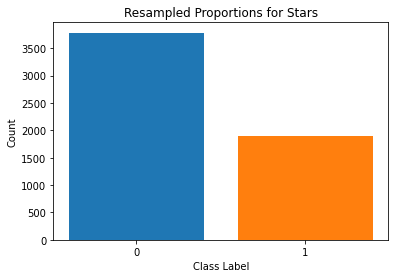

In [378]:
unique, counts = np.unique(y_train, return_counts=True)
x = [0, 1]
labels = ['0', '1']
colors = ['tab:blue', 'tab:orange']
fig, ax = plt.subplots()
ax.bar(unique, counts, color = colors)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_title('Resampled Proportions for Stars')
ax.set_xlabel('Class Label')
ax.set_ylabel('Count')
plt.show()


In [151]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, MaxPooling1D, Conv1D, Flatten, Dropout, Reshape, ZeroPadding1D
from tensorflow.keras.optimizers import Adam

In [409]:
x_train = x_train.to_numpy()

## Model Creation and Evaluation

### Structure of CNN

Here is the structure for the Convolutional Neural Network used in this model:

Here is the structure for the Convolutional Neural Network used in this model:

1. 1D Convolutional Layer: 16 filters, 3 x 3 kernel, ReLU activation, input shape = (# of timesteps (columns), 1)

2. 1D Max Pooling Layer: size = 2, strides = 2

3. Batch Normalization

4. 1D Convolutional Layer: 32 filters, 3 x 3 kernel, ReLU activation

5. 1D Max Pooling Layer: size = 2, strides = 2

6. Batch Normalization

7. 1D Convolutional Layer: 64 filters, 3 x 3 kernel, ReLU activation, input shape = (# of timesteps (columns), 1)

8. 1D Max Pooling Layer: size = 2, strides = 2

9. Batch Normalization

10. 1D Convolutional Layer: 128 filters, 3 x 3 kernel, ReLU activation, input shape = (# of timesteps (columns), 1)

11. 1D Max Pooling Layer: size = 2, strides = 2

12. Batch Normalization

13. Flatten to 1D layer

14. Dropout: 0.5

15. Dense: 64 units, ReLU activation

16. Dropout: 0.25

17. Dense: 64 units, ReLU activation

18. Dense: 1 unit, Sigmoid activation


Model hyperparamaters were batch size = 64, and epochs = 50, optimizer = Adam, and loss = binary_crossentropy

In [410]:
model = Sequential()
model.add(Conv1D(filters = 16, kernel_size = 3, activation = 'relu', input_shape = (x_train.shape[1], 1), padding='same'))
model.add(MaxPooling1D(pool_size = 2, strides = 2, padding='same'))
model.add(BatchNormalization())
model.add(Conv1D(filters = 32, kernel_size = 3, activation = 'relu', padding='same'))
model.add(MaxPooling1D(pool_size = 2, strides = 2, padding='same'))
model.add(BatchNormalization())
model.add(Conv1D(filters = 64, kernel_size = 3, activation = 'relu', padding='same'))
model.add(MaxPooling1D(pool_size = 2, strides = 2, padding='same'))
model.add(BatchNormalization())
model.add(Conv1D(filters = 128, kernel_size = 3, activation = 'relu', padding='same'))
model.add(MaxPooling1D(pool_size = 2, strides = 2, padding='same'))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dense(units = 1, activation = 'sigmoid'))
model.summary()

Model: "sequential_71"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_171 (Conv1D)         (None, 8, 16)             64        
                                                                 
 max_pooling1d_142 (MaxPooli  (None, 4, 16)            0         
 ng1D)                                                           
                                                                 
 batch_normalization_108 (Ba  (None, 4, 16)            64        
 tchNormalization)                                               
                                                                 
 conv1d_172 (Conv1D)         (None, 4, 32)             1568      
                                                                 
 max_pooling1d_143 (MaxPooli  (None, 2, 32)            0         
 ng1D)                                                           
                                                     

In [411]:
model.compile(optimizer = 'Adam', loss='binary_crossentropy', metrics = ['accuracy'])
history = model.fit(x_train, y_train, batch_size = 64, epochs = 50, verbose = 1)

Epoch 1/50
89/89 [==============================] - 6s 7ms/step - loss: 0.5981 - accuracy: 0.6850
Epoch 2/50
89/89 [==============================] - 1s 7ms/step - loss: 0.4996 - accuracy: 0.7741
Epoch 3/50
89/89 [==============================] - 1s 7ms/step - loss: 0.4602 - accuracy: 0.7964
Epoch 4/50
89/89 [==============================] - 1s 7ms/step - loss: 0.4438 - accuracy: 0.8051
Epoch 5/50
89/89 [==============================] - 1s 7ms/step - loss: 0.4209 - accuracy: 0.8195
Epoch 6/50
89/89 [==============================] - 1s 7ms/step - loss: 0.4029 - accuracy: 0.8267
Epoch 7/50
89/89 [==============================] - 1s 7ms/step - loss: 0.3899 - accuracy: 0.8398
Epoch 8/50
89/89 [==============================] - 1s 7ms/step - loss: 0.3829 - accuracy: 0.8304
Epoch 9/50
89/89 [==============================] - 1s 7ms/step - loss: 0.3791 - accuracy: 0.8325
Epoch 10/50
89/89 [==============================] - 1s 7ms/step - loss: 0.3705 - accuracy: 0.8396
Epoch 11/50
89/89 [

To evaluate model performance, first looking towards our loss and accuracy charted over epochs:

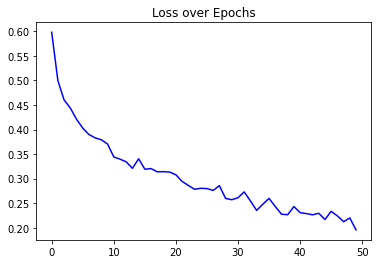

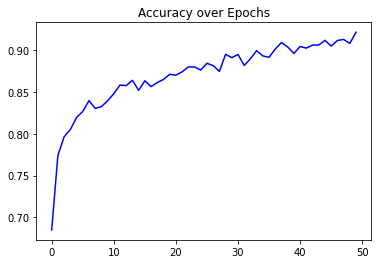

In [412]:
plt.plot(history.history['loss'], color='b')
plt.title('Loss over Epochs')
plt.show()
plt.plot(history.history['accuracy'], color='b')
plt.title('Accuracy over Epochs')
plt.show()

In [398]:
model.evaluate(x_test, y_test)

40/40 [==============================] - 1s 4ms/step - loss: 0.1160 - accuracy: 0.9906


[0.11604265868663788, 0.9905660152435303]

Then looking at a confusion matrix to show our prediction performance:

40/40 [==============================] - 1s 5ms/step


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_22936\4029204614.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_pred = (model.predict(x_test) > 0.5).astype(np.int)


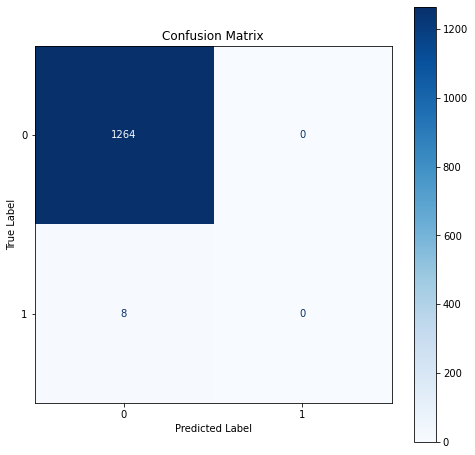

In [413]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
y_pred = (model.predict(x_test) > 0.5).astype(np.int)
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8, 8))
cm_display = ConfusionMatrixDisplay(cm)
cm_display.plot(ax=ax, cmap='Blues')
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

Frustratingly, no correct predictions for finding an exoplanet. Looking at other performance metrics (ultimately redundant given model performance):

In [397]:
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
acc = accuracy_score(y_test, y_pred.round())
precision = precision_score(y_test, y_pred.round())
recall = recall_score(y_test, y_pred.round())
f1 = f1_score(y_test, y_pred.round())
print('Accuracy: {:.4f}'.format(acc))
print('Precision: {:.4f}'.format(precision))
print('Recall: {:.4f}'.format(recall))
print('F1 Score: {:.4f}'.format(f1))

Accuracy: 0.9906
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


c:\Users\patri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


To check if this was related to the neural network specifically, I ran a support vector machine classifier to weigh its performance against the CNN:

c:\Users\patri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


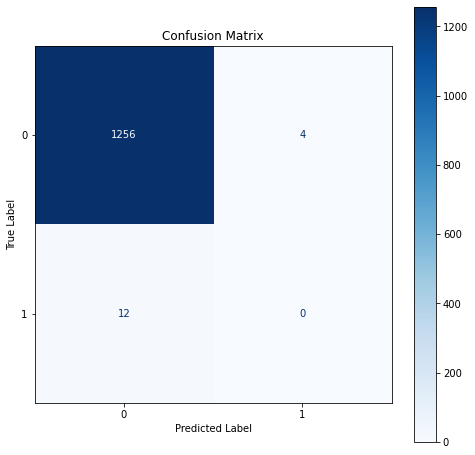

In [399]:
from sklearn.svm import SVC
svc = SVC()
svc_model = svc.fit(x_train, y_train)
svc_pred = svc_model.predict(x_test)
svc_cm = confusion_matrix(y_test, svc_pred)
fig, ax = plt.subplots(figsize=(8, 8))
svc_cm_display = ConfusionMatrixDisplay(svc_cm)
svc_cm_display.plot(ax=ax, cmap='Blues')
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()


While the support vector machine at least classified some stars as having orbiting planets, still no correct predictions.

## Conclusions / Looking Forward

It is important to note that after discovering that both the SVM and CNN were unable to accurately find an orbiting exoplanet, I retrained the CNN model with multiple variations of the data preprocessed differently. This included:
- different distributions
- different normalization techniques
- no normalization (just the batch normalization within the model)
- no standardization
- no Principal Component Analysis

For the sake of redundancy, performance metrics / visualizations from the re-trained models have not been included in this presentation as they show the same result: every model created still resulted in a lack of an accurate exoplanet prediction.

Ultimately, two different classifications attempts technically proved successful: both had high accuracy measurements. If I was to continue my analysis further, some things I would focus on:
- cross-validation for the neural network hyperparameters
- using CNNs with different architectures
- different preprocessing techniques